Example
---
Suppose that $f(x)=x^4+4x^3$ for $x\in[-4,4]$.
1. critical points:
\begin{eqnarray}\large{f'(x)=0}& \large{\Rightarrow}&\large{4 x^{3} + 12 x^{2}=0 }\cr &\large{\Rightarrow}&\large{4 x^{2} \left(x + 3\right)=0} \cr&\large{\Rightarrow}&\large{ x= \mathtt{\text{ -3, 0,}}}\end{eqnarray}
2. Monotonicity:
 - $f'>0\Rightarrow f$ increasion: for $x\in(-4,-3)\cup(0,4)$.
 - $f'<0\Rightarrow f$ decreasion: for $x\in(-3,0)$.
3.  $\large{f''(x)=12 x^{2} + 24 x=12 x \left(x + 2\right)}$
4. Concavity:
 - $f''(x)>0\Rightarrow f$ concave upwards: $x\in(-4,-2)\cup(0,4)$;
 - $f''(x)<0\Rightarrow f$ concave downwards: $x\in(-2,0)$;
5. Extrema: Compare the function values at the critical points and boundary points: $x=-4,-3,0,4$:
$$ f(-4)=0,f(-3)=-27,f(0)=0,f(4)=512$$.
Therefor, Maximum = $512$, Minimum = $-27$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

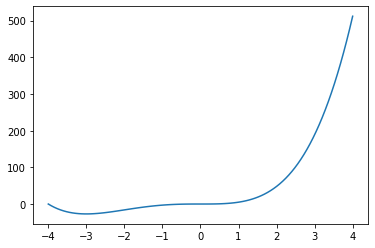

In [14]:
x= np.linspace(-4,4,101)
plt.plot(x,x**4+4*x**3)